Stochastic Calculus 

In [1]:
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt

In [2]:
# Simulate a brownian path using numpy. 
# Create a numpy array and append each random up or down step 
def brownian_path(end_time, time_step):
    total_len = int(end_time/time_step) +1
    BP = [0]*total_len
    
    for i in range(1,total_len):
        std=math.sqrt(time_step)
        BP[i] = np.random.normal(0,std,1)
    
    # Make a NumPy array containing both strings and floats, 
    # by using the dtype object, which enables the array to hold arbitrary Python objects:
    BP = np.array(BP,dtype = object).cumsum()
    time_line = np.array([time_step*i for i in range(total_len)])
    
    return (time_line, BP) 

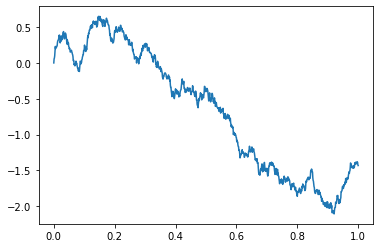

In [4]:
# Plot a single Brownian path with time step 0.001 with an end time of 1
seed = 0
np.random.seed(seed)
[time,BP]=brownian_path(1,0.001)
plt.plot(time,BP)
plt.show()

In [5]:
# Plot brownian bridge
# The whole point of brownian bridge is to create multiple brownian paths that 
# converge to where it orginally started
def brownian_bridge(end_time, time_step, n):
    for j in range(n):
        time_line, BP = brownian_path(end_time, time_step)
        B_1 = BP[-1]
        M_t = [BP[i] - t * B_1 for i,t in enumerate(time_line)]
        plt.plot(time_line, M_t)
    plt.show()

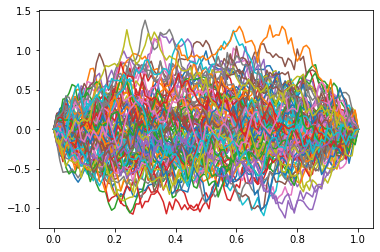

In [6]:
# Plot 100 paths
brownian_bridge(1,0.01,100)

In [7]:
# Simulate martingales using updated Brownian paths
# Suppose Martingale is a stock price chart
# By definition, martingale is a conditional expectation of the 
# price tomorrow given the filtration is the price today
def martingale(end_time, time_step, n):
    for j in range(n):
        time_line, BP = brownian_path(end_time, time_step)
        new_BP = np.square(BP)
        updated_BP = [new_BP[i] - t for i,t in enumerate(time_line)]
        updated_BP = np.array(updated_BP,dtype = object)
        plt.plot(time_line, updated_BP)
    plt.show()

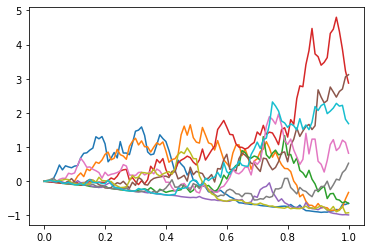

In [8]:
seed = 0
paths = 10
np.random.seed(seed)
martingale(1,0.01,paths)

In [ ]:
# The most imporant random processes - The World Famous Geometric Brownian Motion
# Geometric Brownian Motion is used to model stock price behavior, 
# which furthermore can be implemented in Options Modeling
# Geometric Brownian Motion becomes a martingale with a specific drift - that is why it is so good for modeling stock prices
def geometric_brownian_motion(end_time, time_step, n):
    for j in range(n):
        time_line, BP = brownian_path(end_time, time_step)
        new_BP = [BP[i] - (t/2) for i,t in enumerate(time_line)]
        S_t = np.array([np.exp(i) for i in new_BP], dtype = object)
        plt.plot(time_line, S_t)
    plt.show()